
---
title: "Análisis de Riesgo de Diabetes"
---

# Introducción

La diabetes es una condición crónica que afecta a millones de personas en todo el mundo, con consecuencias importantes para la salud y la economía. Los factores de riesgo incluyen, entre otros, el sobrepeso, la inactividad física y la predisposición genética. La detección temprana del riesgo de diabetes es esencial para prevenir la aparición de la enfermedad y minimizar sus efectos.

Este análisis tiene como objetivo predecir el riesgo de diabetes en individuos utilizando un modelo de aprendizaje supervisado. Los datos provienen del Behavioral Risk Factor Surveillance System (BRFSS) de 2015, una encuesta de salud pública que recopila información sobre factores de riesgo relacionados con la salud en adultos en los Estados Unidos.

Para este análisis, utilizaremos Python y el paquete de pandas para manipular y analizar los datos.

## Carga de Librerías

Primero, instalaremos y cargaremos las librerías necesarias para este análisis.



In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, make_scorer, fbeta_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from typing import Tuple, Dict, Any


## Carga de Datos

A continuación, cargaremos los datos del archivo `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`, el cual debe estar en el mismo directorio que este notebook. Verificaremos las primeras filas para entender la estructura del conjunto de datos.



In [2]:
#Carga de datos
data = pd.read_csv('../data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Ver nombres de columnas y tipos de datos
print(data.dtypes)

# Mostrar las primeras filas del conjunto de datos
print(data.head())

# Mostrar las dimensiones del conjunto de datos (filas, columnas)
print(data.shape)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0  


# Preprocesamiento de Datos

Detección y manejo de errores faltantes



In [3]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())

# Imputar valores faltantes con la mediana (apropiado para características numéricas continuas)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verificar que no haya valores faltantes restantes
assert data_imputed.isnull().sum().sum() == 0, "Aún hay valores faltantes"

Valores faltantes por columna:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Normalización de los datos

In [4]:
# Separar las características de la etiqueta
X = data_imputed.drop(columns=['Diabetes_binary'])
y = data_imputed['Diabetes_binary']

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir nuevamente a DataFrame para mantener la estructura
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=123)

In [5]:
# Diabetes_binary es la variable objetivo
X = data.drop(columns=['Diabetes_binary'])  # Eliminar la columna objetivo
y = data['Diabetes_binary']

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Naive Bayes

Naive Bayes es útil para predecir diabetes porque es un algoritmo simple, rápido y eficiente que asume independencia condicional entre las características. Su facilidad de uso lo hace ideal para tareas de diagnóstico rápido. Además, ofrece una alta interpretabilidad, lo cual es crucial en aplicaciones médicas donde es importante entender cómo cada variable (como hipertensión, colesterol alto o índice de masa corporal) contribuye al riesgo de la enfermedad.

Este modelo es adecuado para manejar tanto datos categóricos como continuos, lo que lo hace versátil en contextos clínicos. También proporciona una buena precisión sin requerir ajustes complejos. Aunque Naive Bayes puede no ser el modelo más sofisticado, su enfoque probabilístico lo convierte en una herramienta efectiva para problemas de clasificación binaria como el diagnóstico de diabetes, ayudando a los profesionales de la salud a tomar decisiones informadas basadas en probabilidades claras.

Accuracy: 0.7180
AUC: 0.7861

Matriz de Confusión:
[[5139 1951]
 [2036 5013]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      7090
         1.0       0.72      0.71      0.72      7049

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



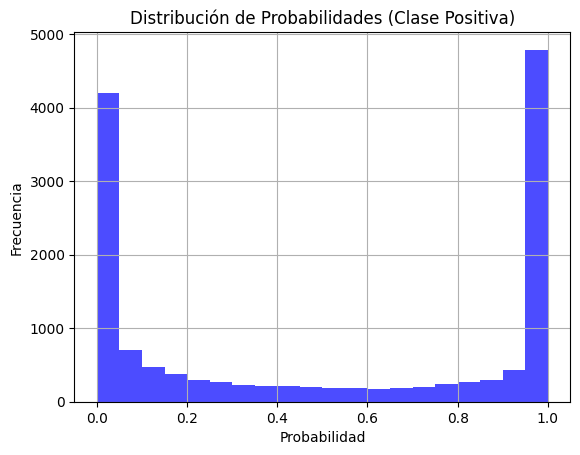

In [6]:
# Crear modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Predicciones
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización opcional: Distribución de probabilidades

plt.hist(y_prob, bins=20, alpha=0.7, color='blue', label='Probabilidades')
plt.title('Distribución de Probabilidades (Clase Positiva)')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### OPTIMIZAMOS LOS RESULTADOS 


El var_smoothing controla la porción de la varianza más grande de todas las características que se añade a las varianzas para estabilidad.  
Se prueba en escala logarítmica desde 10^-11 hasta 10^-7.  
Valores más altos = más suavizado = modelo más robusto, pero potencialmente menos preciso.  
Valores más bajos = menos suavizado = puede capturar mejor patrones sutiles pero riesgo de overfitting.  
Prueba diferentes probabilidades a priori para las clases.  
None: usa las frecuencias observadas en los datos.  
Distribución real de clases: puede ayudar con datos desbalanceados.  
Distribución equitativa: útil cuando queremos igual importancia a ambas clases.  

*Selección de características*:

Prueba diferentes cantidades de características usando SelectKBest
Usa mutual_info_classif que:
Mide dependencias no lineales entre variables
Es más robusto que correlación lineal
Ayuda a identificar las características más informativas


*Estrategia de validación*:

Usa validación cruzada estratificada (StratifiedKFold)
Optimiza para AUC-ROC (refit='roc_auc') que:
Es más robusto que accuracy para clases desbalanceadas
Evalúa el rendimiento en diferentes umbrales de decisión


*Esta combinación de parámetros es efectiva porque*:

Asegura que los datos cumplan las asunciones de GaussianNB
Explora sistemáticamente diferentes niveles de suavizado
Considera diferentes escenarios de probabilidades previas
Selecciona automáticamente las características más 


In [ ]:
def find_optimal_threshold(fpr, tpr, thresholds, min_recall=0.85):
    for i, threshold in enumerate(thresholds):
        if tpr[i] >= min_recall:
            return threshold
    return thresholds[np.argmax(tpr - fpr)]

In [7]:
def optimize_gaussian_nb(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float = 0.2,
    random_state: int = 42,
    n_splits: int = 5,
    feature_selection: bool = True
) -> Tuple[Pipeline, Dict[str, Any], float, float]:

        
    # División estratificada de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    
    # Crear pipeline
    steps = []
    
    # Añadir selección de características si se solicita
    if feature_selection:
        steps.append(('feature_selection', SelectKBest(score_func=mutual_info_classif)))
    
    # Añadir el modelo
    steps.append(('classifier', GaussianNB()))
    
    pipeline = Pipeline(steps)
    
    # Definir grid de parámetros
    param_grid = {
        'classifier__var_smoothing': np.logspace(-11, -7, 20),
        'classifier__priors': [
            None,
            [y_train.mean(), 1 - y_train.mean()],
            [0.5, 0.5]
        ]
    }
    
    if feature_selection:
        # Añadir parámetros para selección de características
        max_features = min(20, X.shape[1])
        param_grid['feature_selection__k'] = [
            max(1, i) for i in range(5, max_features + 1, 2)
        ]
    
    # Configurar búsqueda de hiperparámetros
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=123),
        scoring={
            'roc_auc': 'roc_auc',
            'accuracy': 'accuracy',
            'recall': 'recall',
            'f2': make_scorer(fbeta_score, beta=2)
        },
        refit='f2',
        n_jobs=-1,
        verbose=1
    )
    
    # Entrenar modelo
    grid_search.fit(X_train, y_train)

    
    # Evaluar mejor modelo
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    y_prob = best_pipeline.predict_proba(X_test)[:, 1]
        # Calculamos la curva ROC y obtenemos los verdaderos y falsos positivos (TPR y FPR) junto con los umbrales
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

        # Identificamos el umbral óptimo basándonos en la curva ROC
    optimal_threshold = find_optimal_threshold(fpr, tpr, thresholds)
    print(f"\nOptimal Threshold: {optimal_threshold:.2f}")

        # Ajustamos las predicciones utilizando el umbral óptimo
    y_pred_final = (y_prob >= optimal_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_final)
    auc = roc_auc_score(y_test, y_pred_final)
    cm_final = confusion_matrix(y_test, y_pred_final)

    # Representamos la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest Classifier')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    
    # Imprimir resultados
    print("=== Resultados de la Optimización ===")
    print(f"\nMejores Hiperparámetros:")
    for param, value in grid_search.best_params_.items():
        print(f"{param}: {value}")
    
    print(f"\nRendimiento en Test:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

    print("\nConfusion Matrix with Optimal Threshold:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title('Confusion Matrix with Optimal Threshold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_final))
    
    if feature_selection:
        print("\nCaracterísticas seleccionadas:")
        selected_features_mask = best_pipeline.named_steps['feature_selection'].get_support()
        selected_features = X.columns[selected_features_mask].tolist()
        print(f"Número de características: {len(selected_features)}")
        print("Características:", selected_features)
    
    return best_pipeline, grid_search.best_params_, accuracy, auc


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
=== Resultados de la Optimización ===

Mejores Hiperparámetros:
classifier__priors: None
classifier__var_smoothing: 1e-11
feature_selection__k: 5

Rendimiento en Test:
Accuracy: 0.7330
AUC-ROC: 0.8098

Confusion Matrix with Optimal Threshold:


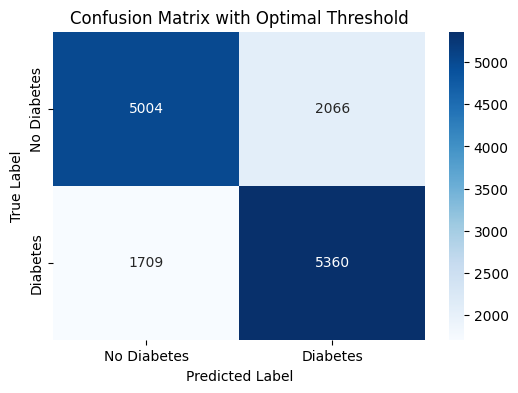


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      7070
         1.0       0.72      0.76      0.74      7069

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139


Características seleccionadas:
Número de características: 5
Características: ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']


In [8]:
pipeline, best_params, accuracy, auc = optimize_gaussian_nb(
    X,
    y,
    test_size=0.2,
    random_state=42,
    feature_selection=True
)

#### Mejores Hiperparámetros:

classifier__priors: None  
classifier__var_smoothing: 1e-11  
feature_selection__k: 5

### Conclusiones

*Rendimiento General del Modelo*  
Precisión (Accuracy): 0.7330 (73.30%)  
Esto indica que el modelo clasifica correctamente el 73% de los casos en el conjunto de prueba.  
AUC-ROC (0.8098): Una puntuación AUC-ROC de 0.8098 sugiere que el modelo es bastante capaz de diferenciar entre las clases (diabetes o no diabetes). Valores superiores a 0.8 generalmente representan un buen desempeño en tareas de clasificación.


*Reporte de Clasificación*

Clase 0 (sin diabetes):

Precisión: 0.75  
Recall: 0.71  
F1-Score: 0.73  
El modelo clasifica con mayor precisión la clase 0, aunque con una tasa de falsos negativos moderada.  

Clase 1 (con diabetes/prediabetes):

Precisión: 0.72  
Recall: 0.76  
F1-Score: 0.74  
Hay un buen equilibrio entre precisión y recall, pero el modelo tiende a ser más efectivo en detectar casos positivos de diabetes (recall más alto).  
El promedio ponderado de precisión, recall y F1 es consistente, 0.74, lo que muestra un buen balance global.

*Selección de Características*  
El modelo seleccionó cinco características clave para la predicción:

HighBP (Hipertensión)  
HighChol (Colesterol alto)  
BMI (Índice de Masa Corporal)  
GenHlth (Salud general)  
Age (Edad)  

Estas características están alineadas con factores de riesgo comúnmente asociados con la diabetes, lo que sugiere que el modelo tiene sentido desde un punto de vista clínico.

*Conclusiones y Posibles Mejoras*
Fiabilidad aceptable pero mejorable: Aunque el modelo proporciona un rendimiento razonablemente bueno, mejorar la precisión podría requerir el uso de modelos más complejos (como Random Forest o XGBoost), o una mayor optimización de los hiperparámetros.

Interpretabilidad: Naive Bayes es un modelo simple y fácil de interpretar, lo que es una ventaja para aplicaciones médicas donde la comprensión de los factores predictivos es clave.  
En general, los resultados muestran que Naive Bayes es una buena aproximación inicial para este problema, aunque existen oportunidades para mejorar el rendimiento si se buscan enfoques más sofisticados o datos adicionales.